# Wavelet analysis for rotation period extraction 

This notebook provide an example of analysis replacing the Lomb-Scargle periodogram by a wavelet analysis of the time series. The wavelet analysis is not a part of the PLATO rotation & activity baseline aglorithm but represents an interesting alternative in order to assess the performances of the framework. 

In [1]:
import plato_msap4_demonstrator as msap4

## A simple example

In [2]:
import importlib
import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists ('stellar_analysis_features') :
    os.mkdir ('stellar_analysis_features')
if not os.path.exists ('stellar_analysis_plots') :
    os.mkdir ('stellar_analysis_plots')    

Our working case is KIC 3733735.

In [3]:
filename = msap4.get_target_filename (msap4.timeseries, '003733735')
t, s, dt = msap4.load_resource (filename)

In order to save computing time, we rebin the data in 4-hour bins.

In [4]:
dt *= 4
t = np.mean (t.reshape (-1,4), axis=1)
s = np.mean (s.reshape (-1,4), axis=1)

In [5]:
t.shape, s.shape, dt

((17991,), (17991,), 0.08173461444675922)

We now run the analysis pipeline. In particular, we can take a look at the plots made from the different analysis methods. 

/Users/sbreton/miniconda3/envs/main-3.9/lib/python3.9/site-packages/plato_msap4_demonstrator/wavelets.py:58: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1 / (periods*86400)


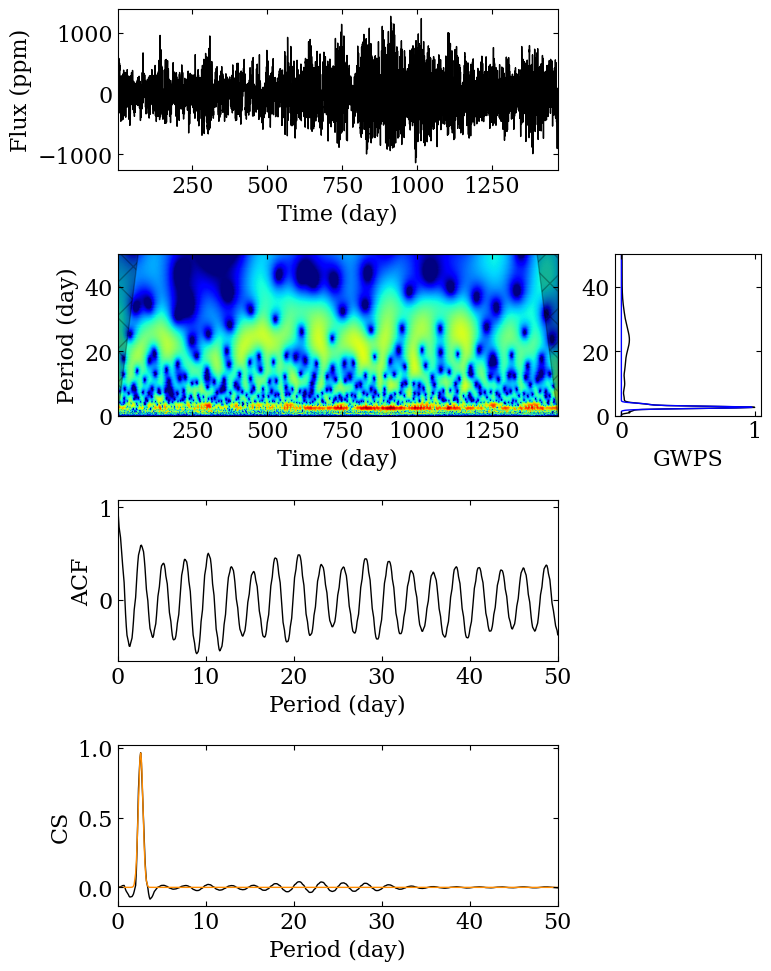

In [6]:
p_in = np.linspace (0, 50, 500)
(p_acf, gwps, wps, acf, 
 cs, coi, features, feature_names, _) = msap4.analysis_pipeline (t, s, periods_in=p_in, figsize=(8,10),
                                                         wavelet_analysis=True, plot=True,
                                                         show=True, xlim=(0,50), normscale='log')